In [1]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

import matplotlib.cm as cm

from math import *

from mpl_toolkits.mplot3d.axes3d import Axes3D

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl

import os 

import sys

import seaborn as sns



In [2]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 


In [3]:
sns.set()
sns.set_style('white')
sns.set_context('talk')

In [4]:
CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run02/gridGlob.nc'
CanyonGridOut = Dataset(CanyonGrid)

NoCCanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/gridGlob.nc'
NoCCanyonGridOut = Dataset(NoCCanyonGrid)

CanyonState='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run02/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)

In [5]:
nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 

xc = rout.getField(CanyonGrid, 'XC') # x coords tracer cells
yc = rout.getField(CanyonGrid, 'YC') # y coords tracer cells
rc = CanyonGridOut.variables['RC']
bathy = rout.getField(CanyonGrid, 'Depth')

hFacC = rout.getField(CanyonGrid, 'HFacC')
MaskC = rout.getMask(CanyonGrid, 'HFacC')

xcNoC = rout.getField(NoCCanyonGrid, 'XC') # x coords tracer cells
ycNoC = rout.getField(NoCCanyonGrid, 'YC') # y coords tracer cells

bathyNoC = rout.getField(NoCCanyonGrid, 'Depth')

hFacCNoC = rout.getField(NoCCanyonGrid, 'HFacC')
MaskCNoC = rout.getMask(NoCCanyonGrid, 'HFacC')

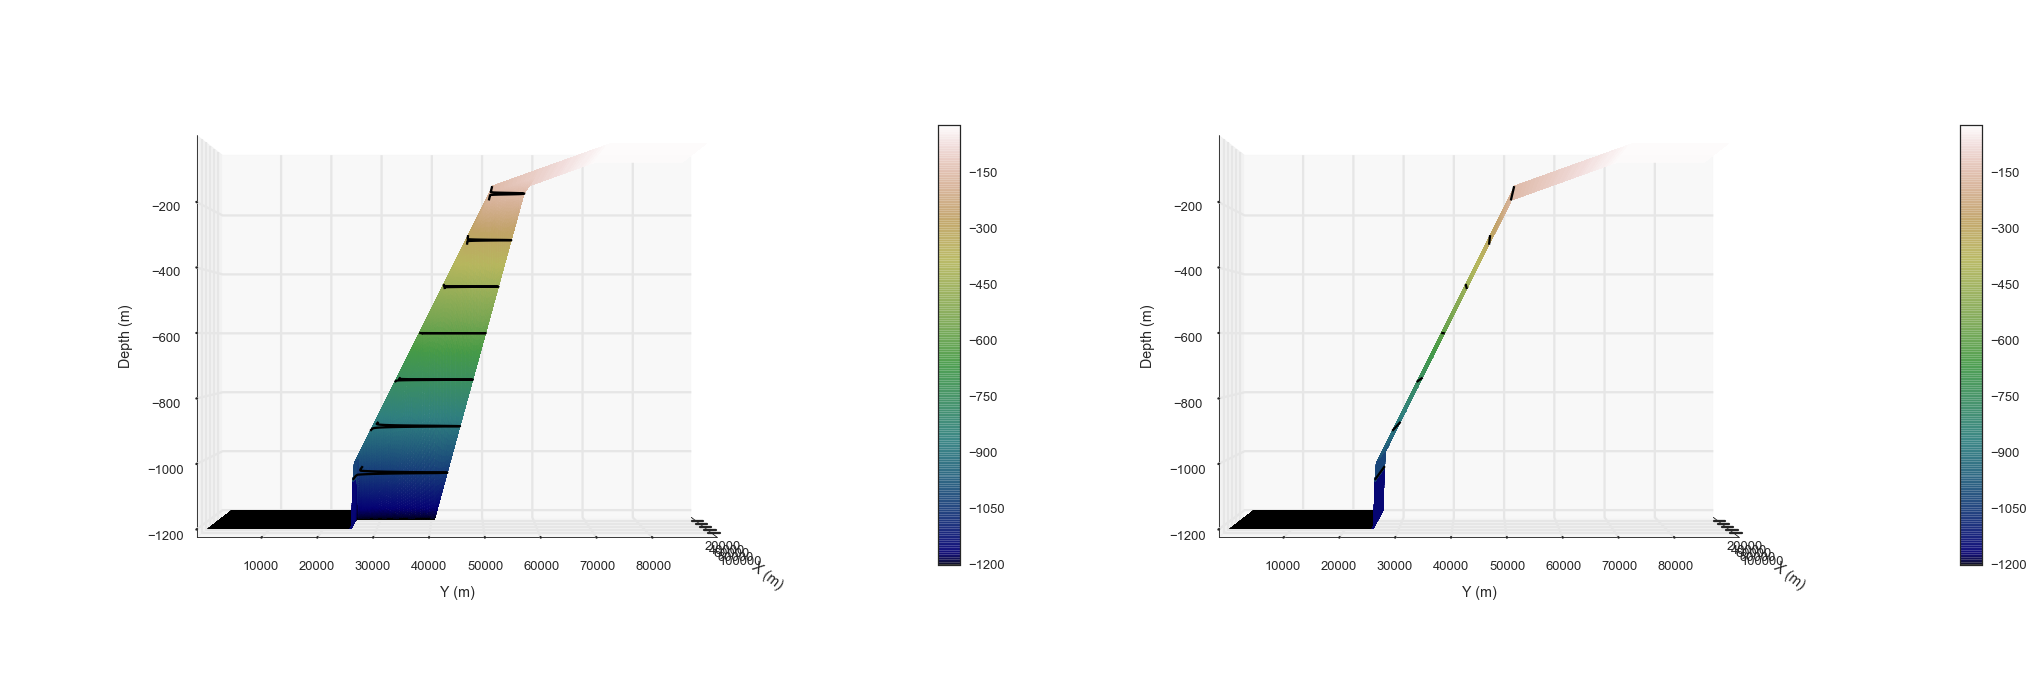

In [6]:
plt.rcParams['contour.negative_linestyle'] = 'solid' # default is to have negative contours with dashed lines
plt.rcParams.update({'font.size':20})

# Plot 3D bathymetry

fig = plt.figure(figsize=(30,10))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax1 = fig.add_subplot(1, 2, 1, projection='3d')

p = ax1.plot_surface(xc,yc,-bathy, rstride=2, cstride=2,alpha=0.75,cmap=cm.gist_earth, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.65)
cset = ax1.contour(xc,yc,-bathy,colors='k',linewidth=2, rstride=2, cstride=2,zdir='z')
ax1.set_aspect('auto')
ax1.view_init(0, 0) # elevation and azimuth
ax1.set_ylabel('Y (m)')
ax1.set_xlabel('X (m)')
ax1.set_zlabel('Depth (m)')
plt.tight_layout()

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

p = ax2.plot_surface(xcNoC,ycNoC,-bathyNoC, rstride=2, cstride=2,alpha=0.75,cmap=cm.gist_earth, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.65)
cset = ax2.contour(xcNoC,ycNoC,-bathyNoC,colors='k',linewidth=2, rstride=2, cstride=2,zdir='z')
ax2.set_aspect('auto')
ax2.view_init(0, 0) # elevation and azimuth
ax2.set_ylabel('Y (m)')
ax2.set_xlabel('X (m)')
ax2.set_zlabel('Depth (m)')
plt.tight_layout()

#fig.savefig('/ocean/kramosmu/Figures/Bathy3DComparison1.eps', format='eps', dpi=1000, bbox_inches='tight')

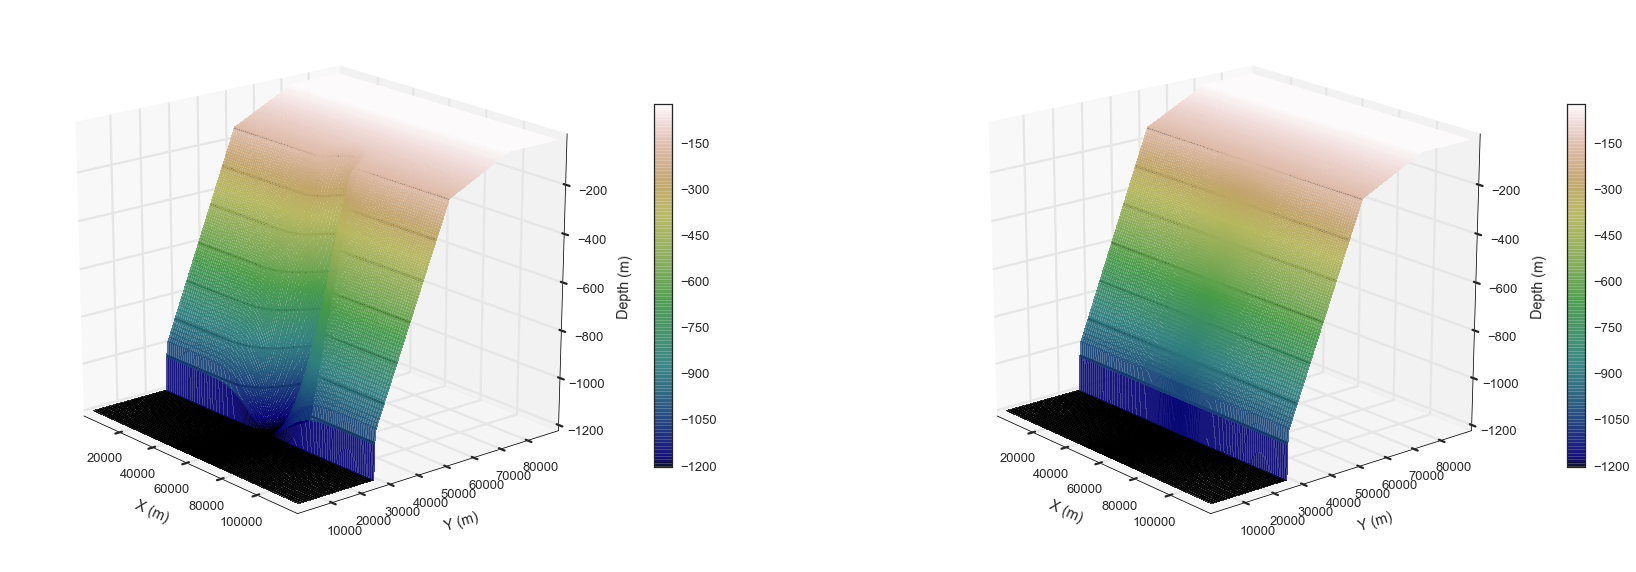

In [7]:
plt.rcParams['contour.negative_linestyle'] = 'solid' # default is to have negative contours with dashed lines
plt.rcParams.update({'font.size':20})

# Plot 3D bathymetry

fig = plt.figure(figsize=(30,10))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax1 = fig.add_subplot(1, 2, 1, projection='3d')

p = ax1.plot_surface(xc,yc,-bathy, rstride=2, cstride=2,alpha=0.75,cmap=cm.gist_earth, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.65)
cset = ax1.contour(xc,yc,-bathy,colors='k',linewidth=2, rstride=2, cstride=2,zdir='z')

ax1.set_aspect('auto')

ax1.view_init(20, -40) # elevation and azimuth

ax1.set_ylabel('Y (m)')
ax1.set_xlabel('X (m)')
ax1.set_zlabel('Depth (m)')

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

p = ax2.plot_surface(xcNoC,ycNoC,-bathyNoC, rstride=2, cstride=2,alpha=0.75,cmap=cm.gist_earth, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.65)
cset = ax2.contour(xcNoC,ycNoC,-bathyNoC,colors='k',linewidth=2, rstride=2, cstride=2,zdir='z')

ax2.set_aspect('auto')

ax2.view_init(20, -40) # elevation and azimuth

ax2.set_ylabel('Y (m)')
ax2.set_xlabel('X (m)')
ax2.set_zlabel('Depth (m)')

#fig.savefig('/ocean/kramosmu/Figures/Bathy3DComparison2.eps', format='eps', dpi=1000, bbox_inches='tight')

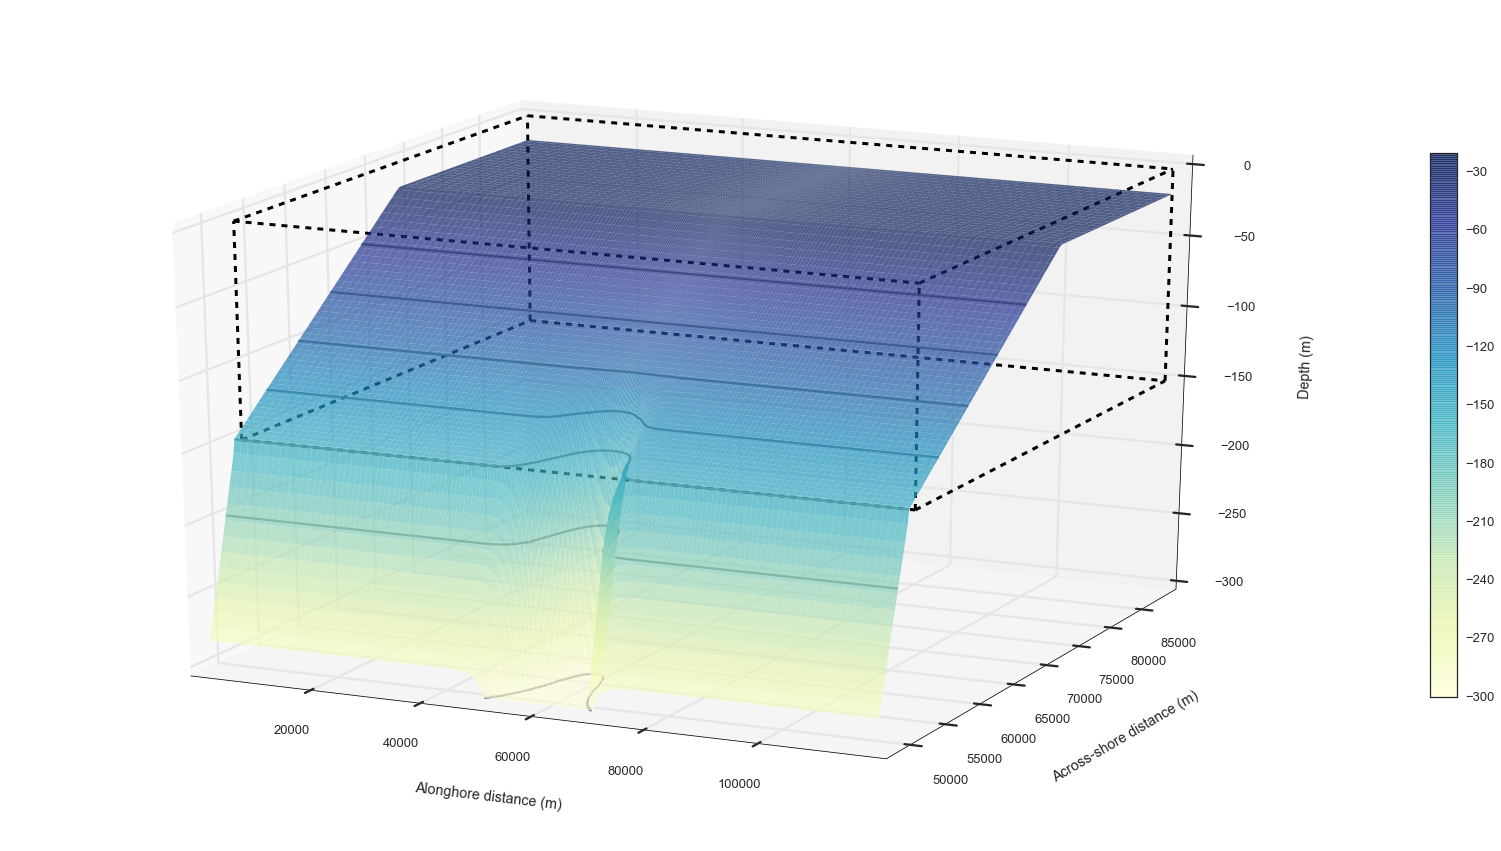

In [65]:
plt.rcParams['contour.negative_linestyle'] = 'solid' # default is to have negative contours with dashed lines
plt.rcParams.update({'font.size':20})

# Plot 3D bathymetry
bathy2 = bathy
bathy2[bathy2 > 300] = 300

fig = plt.figure(figsize=(30,15))
ax1 = fig.add_subplot(1, 1, 1, projection='3d')

ax1.set_zlim3d(-300, 0)

p = ax1.plot_surface(xc[200:,:],yc[200:,:],-bathy2[200:,:],cmap='YlGnBu', linewidth=0.0,alpha=0.70,rstride=2,cstride=2)
cb = fig.colorbar(p, shrink=0.65)
cset = ax1.contour(xc[200:,:],yc[200:,:],-bathy2[200:,:],[-300,-200,-150,-125,-100,-75,-50],colors='0.50',linewidth=1, rstride=2, cstride=2,zdir='z')
ls1 = ax1.plot(xc[230,:],yc[230,:],rc[30],'k--',linewidth = 3)
ls2 = ax1.plot(xc[230,:],yc[230,:],rc[0],'k--',linewidth = 3)
le1 = ax1.plot(xc[230:,359],yc[230:,359],rc[30],'k--',linewidth = 3)
le2 = ax1.plot(xc[230:,359],yc[230:,359],rc[0],'k--',linewidth = 3)
lw1 = ax1.plot(xc[230:,0],yc[230:,0],rc[30],'k--',linewidth = 3)
lw2 = ax1.plot(xc[230:,0],yc[230:,0],rc[0],'k--',linewidth = 3)
ln1 = ax1.plot(xc[359,:],yc[359,:],rc[30],'k--',linewidth = 3)
ln2 = ax1.plot(xc[359,:],yc[359,:],rc[0],'k--',linewidth = 3)
ln3 = ax1.plot([xc[359,359],xc[359,359]],[yc[359,359],yc[359,359]],[rc[30],rc[0]],'k--',linewidth = 3)
ln4 = ax1.plot([xc[359,0],xc[359,0]],[yc[359,0],yc[359,0]],[rc[30],rc[0]],'k--',linewidth = 3)
ls3 = ax1.plot([xc[230,0],xc[230,0]],[yc[230,0],yc[230,0]],[rc[30],rc[0]],'k--',linewidth = 3)
ls4 = ax1.plot([xc[230,359],xc[230,359]],[yc[230,359],yc[230,359]],[rc[30],rc[0]],'k--',linewidth = 3)



ax1.set_aspect('auto')

ax1.view_init(20, -65) # elevation and azimuth

ax1.set_ylabel('Across-shore distance (m)')
ax1.set_xlabel('Alonghore distance (m)')
ax1.set_zlabel('Depth (m)')


#fig.savefig('/ocean/kramosmu/Figures/Bathy3DComparison2.eps', format='eps', dpi=1000, bbox_inches='tight')

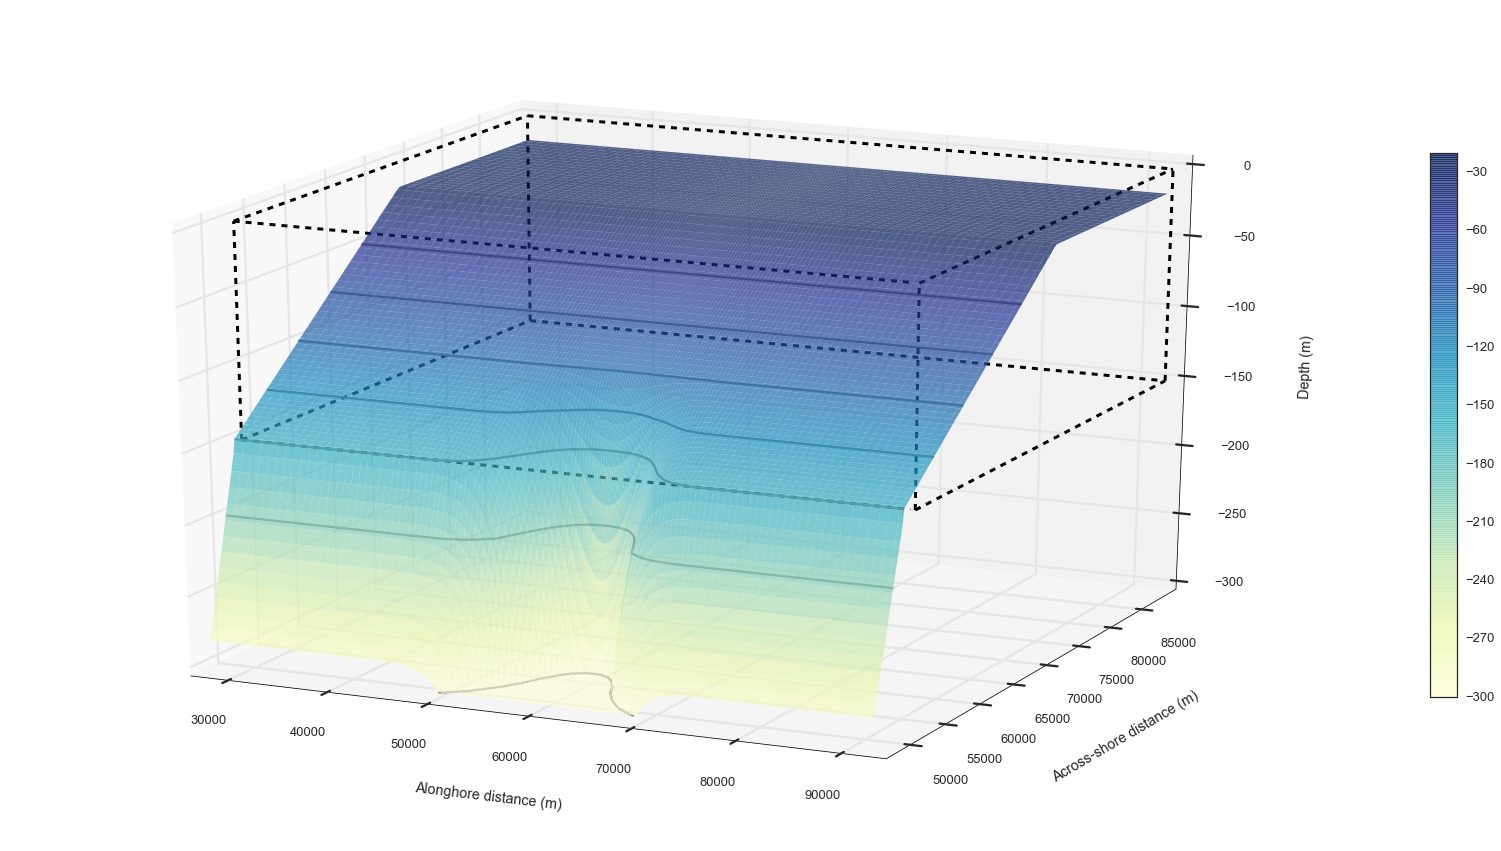

In [67]:
plt.rcParams['contour.negative_linestyle'] = 'solid' # default is to have negative contours with dashed lines
plt.rcParams.update({'font.size':20})

# Plot 3D bathymetry
bathy2 = bathy
bathy2[bathy2 > 300] = 300

fig = plt.figure(figsize=(30,15))
ax1 = fig.add_subplot(1, 1, 1, projection='3d')

ax1.set_zlim3d(-300, 0)

p = ax1.plot_surface(xc[200:,50:-50],yc[200:,50:-50],-bathy2[200:,50:-50],cmap='YlGnBu', linewidth=0.0,alpha=0.70,rstride=2,cstride=2)
cb = fig.colorbar(p, shrink=0.65)
cset = ax1.contour(xc[200:,50:-50],yc[200:,50:-50],-bathy2[200:,50:-50],[-300,-200,-150,-125,-100,-75,-50],colors='0.50',linewidth=1, rstride=2, cstride=2,zdir='z')
ls1 = ax1.plot(xc[230,50:-50],yc[230,50:-50],rc[30],'k--',linewidth = 3)
ls2 = ax1.plot(xc[230,50:-50],yc[230,50:-50],rc[0],'k--',linewidth = 3)
le1 = ax1.plot(xc[230:,-50],yc[230:,-50],rc[30],'k--',linewidth = 3)
le2 = ax1.plot(xc[230:,-50],yc[230:,-50],rc[0],'k--',linewidth = 3)
lw1 = ax1.plot(xc[230:,50],yc[230:,50],rc[30],'k--',linewidth = 3)
lw2 = ax1.plot(xc[230:,50],yc[230:,50],rc[0],'k--',linewidth = 3)
ln1 = ax1.plot(xc[359,50:-50],yc[359,50:-50],rc[30],'k--',linewidth = 3)
ln2 = ax1.plot(xc[359,50:-50],yc[359,50:-50],rc[0],'k--',linewidth = 3)
ln3 = ax1.plot([xc[359,-50],xc[359,-50]],[yc[359,-50],yc[359,-50]],[rc[30],rc[0]],'k--',linewidth = 3)
ln4 = ax1.plot([xc[359,50],xc[359,50]],[yc[359,50],yc[359,50]],[rc[30],rc[0]],'k--',linewidth = 3)
ls3 = ax1.plot([xc[230,50],xc[230,50]],[yc[230,50],yc[230,50]],[rc[30],rc[0]],'k--',linewidth = 3)
ls4 = ax1.plot([xc[230,-50],xc[230,-50]],[yc[230,-50],yc[230,-50]],[rc[30],rc[0]],'k--',linewidth = 3)



ax1.set_aspect('auto')

ax1.view_init(20, -65) # elevation and azimuth

ax1.set_ylabel('Across-shore distance (m)')
ax1.set_xlabel('Alonghore distance (m)')
ax1.set_zlabel('Depth (m)')

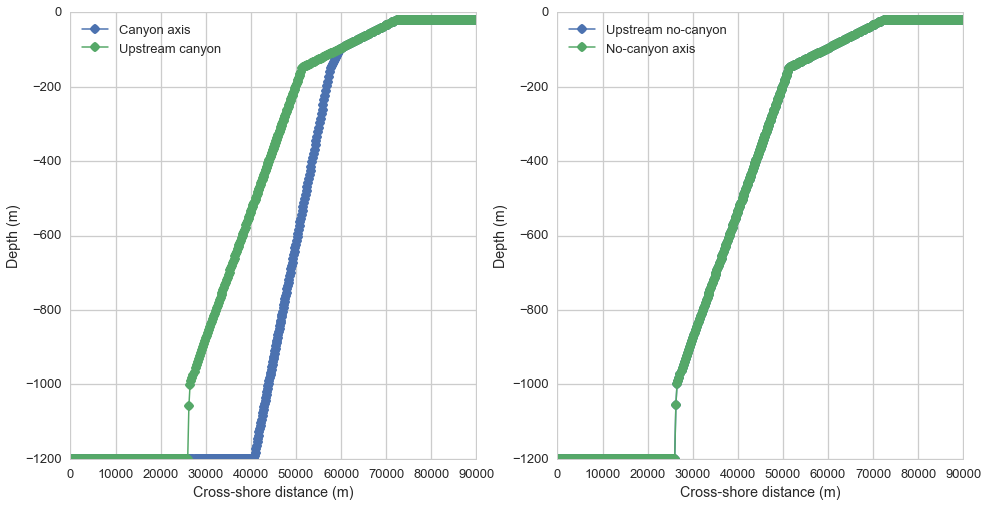

In [47]:
fig45=plt.figure(figsize=(16,8))
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1,rc={"lines.linewidth": 1.5})

ax1 = plt.subplot(1,2,1)

line1 = ax1.plot(yc[:,180], -bathy[:,180],'o-',label='Canyon axis')
line3 = ax1.plot(yc[:,50], -bathy[:,50],'o-',label='Upstream canyon')

plt.ylabel('Depth (m)')
plt.xlabel('Cross-shore distance (m)')
    
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=0)

ax2 = plt.subplot(1,2,2)

line2 = ax2.plot(ycNoC[:,180], -bathyNoC[:,180],'o-',label='No-canyon axis')
line3 = ax2.plot(ycNoC[:,50], -bathyNoC[:,50],'o-',label='Upstream no-canyon')

plt.ylabel('Depth (m)')
plt.xlabel('Cross-shore distance (m)')
    
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels, loc=0)

#fig45.savefig('/ocean/kramosmu/Figures/BathyProfilesComparison.eps', format='eps', dpi=1000, bbox_inches='tight')


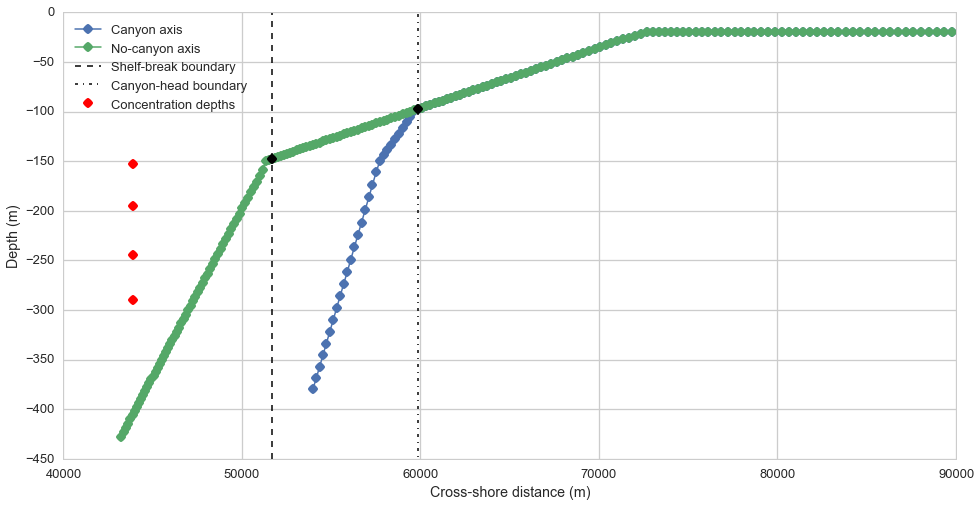

In [159]:
fig45=plt.figure(figsize=(16,8))
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1,rc={"lines.linewidth": 1.5})

ax1 = plt.subplot(1,1,1)

line1 = ax1.plot(yc[240:,180], -bathy[240:,180],'o-',label='Canyon axis')
line2 = ax1.plot(ycNoC[165:,180], -bathyNoC[165:,180],'o-',label='No-canyon axis')

sb = ax1.axvline(x=ycNoC[227,180], ymin=-bathyNoC[227,180],linestyle='--',color='k', label='Shelf-break boundary')
ch = ax1.axvline(x=ycNoC[269,180], ymin=-bathyNoC[269,180],linestyle='-.',color='k', label='Canyon-head boundary')

tracDepth0 = ax1.plot(ycNoC[170,180], rc[30],'or',label='Concentration depths')
tracDepth1 = ax1.plot(ycNoC[170,180], rc[36],'or')
tracDepth2 = ax1.plot(ycNoC[170,180], rc[41],'or')
tracDepth3 = ax1.plot(ycNoC[170,180], rc[44],'or')

sbz = ax1.plot(ycNoC[227,180], rc[29],'ok')
chz = ax1.plot(ycNoC[269,180], rc[19],'ok')

plt.ylabel('Depth (m)')
plt.xlabel('Cross-shore distance (m)')
    
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=0)

#fig45.savefig('/ocean/kramosmu/Figures/ShelfDefinitionsComparison.eps', format='eps', dpi=1000, bbox_inches='tight')


In [161]:
print('Depths at tracer cells from RC (m): canyon head %0.1f, shelf break %0.1f, d1 %0.1f, d2 %0.1f, d3 %0.1f, d4 %0.1f' 
      %(rc[19],rc[29], rc[30],rc[36],rc[41], rc[44]))
print(' ')
print('Shelf-break depth from bathymetry : %0.1f m' %-bathyNoC[227,180])
print(' ')
print('Canyon-head depth from bathymetry : %0.1f m' %-bathy[269,180])
print(' ')
print('Shelf-break cross-shelf distance from bathymetry : %0.1f m' %yc[227,180])
print(' ')
print('Canyon-head cross-shelf distance from bathymetry : %0.1f m' %yc[269,180])
print(' ')



Depths at tracer cells from RC (m): canyon head -97.5, shelf break -147.5, d1 -152.5, d2 -195.0, d3 -245.0, d4 -290.0
 
Shelf-break depth from bathymetry : -147.8 m
 
Canyon-head depth from bathymetry : -97.5 m
 
Shelf-break cross-shelf distance from bathymetry : 51670.7 m
 
Canyon-head cross-shelf distance from bathymetry : 59888.4 m
 


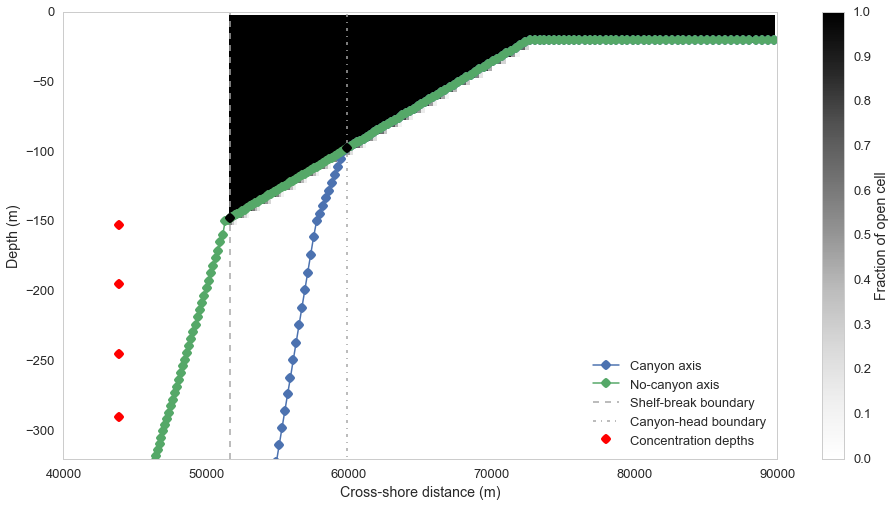

In [184]:
fig45=plt.figure(figsize=(16,8))
sns.set(context='talk', style='whitegrid', font='sans-serif', font_scale=1,rc={"lines.linewidth": 1.5})

ax1 = plt.subplot(1,1,1)
hfac = ax1.pcolor(ycNoC[227:,180],rc[:47],hFacCNoC[:47,227:,180])
colbar = plt.colorbar(hfac,label = 'Fraction of open cell')
line1 = ax1.plot(yc[240:,180], -bathy[240:,180],'o-',label='Canyon axis')
line2 = ax1.plot(ycNoC[165:,180], -bathyNoC[165:,180],'o-',label='No-canyon axis')

sb = ax1.axvline(x=ycNoC[227,180], ymin=-bathyNoC[227,180],linestyle='--',color='0.65', label='Shelf-break boundary')
ch = ax1.axvline(x=ycNoC[269,180], ymin=-bathyNoC[269,180],linestyle='-.',color='0.65', label='Canyon-head boundary')

tracDepth0 = ax1.plot(ycNoC[170,180], rc[30],'or',label='Concentration depths')
tracDepth1 = ax1.plot(ycNoC[170,180], rc[36],'or')
tracDepth2 = ax1.plot(ycNoC[170,180], rc[41],'or')
tracDepth3 = ax1.plot(ycNoC[170,180], rc[44],'or')

sbz = ax1.plot(ycNoC[227,180], rc[29],'ok')
chz = ax1.plot(ycNoC[269,180], rc[19],'ok')

ax1.set_ylim([-320,0])
plt.ylabel('Depth (m)')
plt.xlabel('Cross-shore distance (m)')
    
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=0)

#fig45.savefig('/ocean/kramosmu/Figures/ShelfDefinitionsComparison.eps', format='eps', dpi=1000, bbox_inches='tight')
